In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

## 1. Загрузка и подготовка данных

In [2]:
url = "https://raw.githubusercontent.com/emelkhovsky/machine-leaarning-course/master/aug_train.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(19158, 14)

In [3]:
rows_to_drop = data_raw[
    (data_raw['training_hours'] < data_raw['training_hours'].quantile(0.005)) | (data_raw['training_hours'] > data_raw['training_hours'].quantile(0.995)) | 
    (data_raw['city_development_index']  < data_raw['city_development_index' ].quantile(0.005)) | (data_raw['city_development_index']  > data_raw['city_development_index' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(18891, 14)

In [4]:
data.dropna(axis=0, how='all', subset=['enrolled_university'], inplace=True)
data.dropna(axis=0, how='all', subset=['education_level'], inplace=True)
data.dropna(axis=0, how='all', subset=['experience'], inplace=True)
data.dropna(axis=0, how='all', subset=['last_new_job'], inplace=True)
print(data.shape)
data.isna().sum()

(17769, 14)


enrollee_id                  0
city                         0
city_development_index       0
gender                    3795
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2196
experience                   0
company_size              5229
company_type              5394
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [5]:
data['gender'].fillna(data['gender'].mode().iloc[0], inplace=True)
data['major_discipline'].fillna(data['major_discipline'].mode().iloc[0], inplace=True)
data['company_size'].fillna(data['company_size'].mode().iloc[0], inplace=True)
data['company_type'].fillna(data['company_type'].mode().iloc[0], inplace=True)

In [6]:
print(data.shape)
data.isna().sum()

(17769, 14)


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [7]:
data = pd.get_dummies(data)
print(data.shape)
data.head()

(17769, 180)


,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,36,1.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,29725,0.776,47,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,11561,0.624,83,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,666,0.767,8,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,21651,0.764,24,1.0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [8]:
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_norm.describe()

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
count,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,...,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000,17769.000000
mean,0.506152,0.741678,0.195271,0.245146,0.001407,0.004615,0.014520,0.003827,0.016039,0.234735,...,0.027632,0.006303,0.050312,0.830435,0.431594,0.157240,0.055265,0.056334,0.178232,0.121335
std,0.289407,0.292393,0.179970,0.430186,0.037484,0.067777,0.119623,0.061745,0.125630,0.423845,...,0.163922,0.079144,0.218595,0.375261,0.495313,0.364037,0.228503,0.230572,0.382718,0.326525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255370,0.550971,0.066038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.509392,0.929612,0.141509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.758261,0.953883,0.270440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Разбиение данных на обучающую и тестовую выборки

In [9]:
X = data_norm.drop(['enrollee_id', 'target'], axis=1) 
y = data_norm['target']

print(X.shape)
print(y.shape)

(17769, 178)
(17769,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(11905, 5864)

## 3. Подбор гиперпараметров

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [15:26<00:00, 18.53s/it]


Train: минимальное значение ошибки = 0.0637547249055019, число нейронов = 50
Test: минимальное значение ошибки = 0.21862210095497953, число нейронов = 2


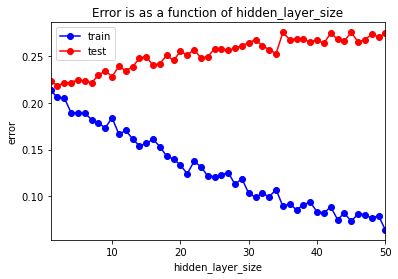

In [13]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print(f"Train: минимальное значение ошибки = {np.min(train_err)}, число нейронов = {hidden_layer_size[np.argmin(train_err)]}")
print(f"Test: минимальное значение ошибки = {np.min(test_err)}, число нейронов = {hidden_layer_size[np.argmin(test_err)]}")

Train: максимальное значение accuracy = 0.9362452750944981, число нейронов = 50
Test: максимальное значение accuracy = 0.7813778990450204, число нейронов = 2


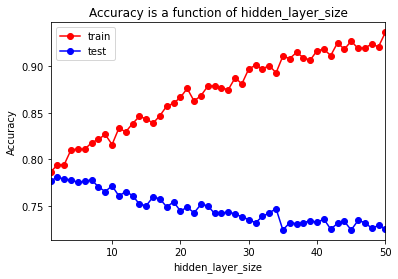

In [16]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print(f"Train: максимальное значение accuracy = {np.max(train_acc)}, число нейронов = {hidden_layer_size[np.argmax(train_acc)]}")
print(f"Test: максимальное значение accuracy = {np.max(test_acc)}, число нейронов = {hidden_layer_size[np.argmax(test_acc)]}")

Наблюдается переобучение. Попробуем изменить количество обучающих и тестовых данных, параметры, алгоритм(sgd)

In [24]:
X = data_norm.drop(['enrollee_id', 'target'], axis=1) 
y = data_norm['target']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(17769, 178)
(17769,)


(15103, 2666)

In [25]:
hidden_layer_size = np.linspace(1, 40, 20)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='sgd', activation='relu', max_iter=1000, random_state=13, learning_rate_init=0.01, verbose = "True")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

  0%|          | 0/20 [00:00<?, ?it/s]

Iteration 1, loss = 0.56336563
Iteration 2, loss = 0.55214717
Iteration 3, loss = 0.53906811
Iteration 4, loss = 0.51993071
Iteration 5, loss = 0.50102790
Iteration 6, loss = 0.48682198
Iteration 7, loss = 0.47747301
Iteration 8, loss = 0.47216379
Iteration 9, loss = 0.46840168
Iteration 10, loss = 0.46576524
Iteration 11, loss = 0.46385347
Iteration 12, loss = 0.46249992
Iteration 13, loss = 0.46147164
Iteration 14, loss = 0.46037522
Iteration 15, loss = 0.45955266
Iteration 16, loss = 0.45901935
Iteration 17, loss = 0.45829605
Iteration 18, loss = 0.45782196
Iteration 19, loss = 0.45741451
Iteration 20, loss = 0.45705472
Iteration 21, loss = 0.45659675
Iteration 22, loss = 0.45646474
Iteration 23, loss = 0.45612734
Iteration 24, loss = 0.45568003
Iteration 25, loss = 0.45580380
Iteration 26, loss = 0.45546393
Iteration 27, loss = 0.45530084
Iteration 28, loss = 0.45528213
Iteration 29, loss = 0.45503180
Iteration 30, loss = 0.45481661
Iteration 31, loss = 0.45468690
Iteration 32, los

  5%|▌         | 1/20 [00:01<00:33,  1.78s/it]

Iteration 73, loss = 0.45290311
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57312145
Iteration 2, loss = 0.52353448
Iteration 3, loss = 0.49173670
Iteration 4, loss = 0.47663868
Iteration 5, loss = 0.46977461
Iteration 6, loss = 0.46514921
Iteration 7, loss = 0.46185519
Iteration 8, loss = 0.45920942
Iteration 9, loss = 0.45728913
Iteration 10, loss = 0.45524415
Iteration 11, loss = 0.45385570
Iteration 12, loss = 0.45297764
Iteration 13, loss = 0.45226579
Iteration 14, loss = 0.45134989
Iteration 15, loss = 0.45046906
Iteration 16, loss = 0.44989769
Iteration 17, loss = 0.44934685
Iteration 18, loss = 0.44877089
Iteration 19, loss = 0.44837485
Iteration 20, loss = 0.44781495
Iteration 21, loss = 0.44771352
Iteration 22, loss = 0.44726890
Iteration 23, loss = 0.44695962
Iteration 24, loss = 0.44668291
Iteration 25, loss = 0.44646829
Iteration 26, loss = 0.44624123
Iteration 27, loss = 0.44573621
Iteration 28, loss = 0.

 10%|█         | 2/20 [00:09<01:33,  5.19s/it]

Iteration 218, loss = 0.43546348
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54495963
Iteration 2, loss = 0.49389703
Iteration 3, loss = 0.47746988
Iteration 4, loss = 0.46790459
Iteration 5, loss = 0.46198955
Iteration 6, loss = 0.45820068
Iteration 7, loss = 0.45607627
Iteration 8, loss = 0.45427592
Iteration 9, loss = 0.45306841
Iteration 10, loss = 0.45230026
Iteration 11, loss = 0.45148528
Iteration 12, loss = 0.45082432
Iteration 13, loss = 0.45030984
Iteration 14, loss = 0.45000713
Iteration 15, loss = 0.44924474
Iteration 16, loss = 0.44900967
Iteration 17, loss = 0.44864757
Iteration 18, loss = 0.44823480
Iteration 19, loss = 0.44793333
Iteration 20, loss = 0.44780759
Iteration 21, loss = 0.44726804
Iteration 22, loss = 0.44729462
Iteration 23, loss = 0.44684238
Iteration 24, loss = 0.44639899
Iteration 25, loss = 0.44637409
Iteration 26, loss = 0.44619262
Iteration 27, loss = 0.44598932
Iteration 28, loss = 0

 15%|█▌        | 3/20 [00:22<02:28,  8.76s/it]

Iteration 346, loss = 0.41830646
Iteration 347, loss = 0.41817515
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55015141
Iteration 2, loss = 0.49529072
Iteration 3, loss = 0.47480369
Iteration 4, loss = 0.46624616
Iteration 5, loss = 0.46100087
Iteration 6, loss = 0.45789707
Iteration 7, loss = 0.45586921
Iteration 8, loss = 0.45428660
Iteration 9, loss = 0.45342334
Iteration 10, loss = 0.45259440
Iteration 11, loss = 0.45182073
Iteration 12, loss = 0.45104617
Iteration 13, loss = 0.45037828
Iteration 14, loss = 0.45000182
Iteration 15, loss = 0.44920871
Iteration 16, loss = 0.44919487
Iteration 17, loss = 0.44853485
Iteration 18, loss = 0.44809505
Iteration 19, loss = 0.44812551
Iteration 20, loss = 0.44756999
Iteration 21, loss = 0.44720030
Iteration 22, loss = 0.44686435
Iteration 23, loss = 0.44667240
Iteration 24, loss = 0.44620077
Iteration 25, loss = 0.44600761
Iteration 26, loss = 0.44553708
Iteration 27, loss = 

 20%|██        | 4/20 [00:33<02:33,  9.58s/it]

Iteration 300, loss = 0.41321421
Iteration 301, loss = 0.41263839
Iteration 302, loss = 0.41274574
Iteration 303, loss = 0.41264521
Iteration 304, loss = 0.41270040
Iteration 305, loss = 0.41247058
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54307993
Iteration 2, loss = 0.50163974
Iteration 3, loss = 0.48076637
Iteration 4, loss = 0.46757852
Iteration 5, loss = 0.46093147
Iteration 6, loss = 0.45717949
Iteration 7, loss = 0.45490936
Iteration 8, loss = 0.45328382
Iteration 9, loss = 0.45213416
Iteration 10, loss = 0.45111269
Iteration 11, loss = 0.45054340
Iteration 12, loss = 0.44972657
Iteration 13, loss = 0.44940390
Iteration 14, loss = 0.44892339
Iteration 15, loss = 0.44830098
Iteration 16, loss = 0.44785722
Iteration 17, loss = 0.44761626
Iteration 18, loss = 0.44741508
Iteration 19, loss = 0.44695735
Iteration 20, loss = 0.44663118
Iteration 21, loss = 0.44646846
Iteration 22, loss = 0.44606887
Iteration 23, los

 25%|██▌       | 5/20 [00:47<02:50, 11.40s/it]

Iteration 401, loss = 0.40217687
Iteration 402, loss = 0.40182245
Iteration 403, loss = 0.40214436
Iteration 404, loss = 0.40201474
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55216699
Iteration 2, loss = 0.50939486
Iteration 3, loss = 0.48753719
Iteration 4, loss = 0.47432735
Iteration 5, loss = 0.46584971
Iteration 6, loss = 0.46133228
Iteration 7, loss = 0.45821101
Iteration 8, loss = 0.45642995
Iteration 9, loss = 0.45489619
Iteration 10, loss = 0.45334643
Iteration 11, loss = 0.45281191
Iteration 12, loss = 0.45168772
Iteration 13, loss = 0.45109888
Iteration 14, loss = 0.45067628
Iteration 15, loss = 0.44990434
Iteration 16, loss = 0.44941704
Iteration 17, loss = 0.44931241
Iteration 18, loss = 0.44876930
Iteration 19, loss = 0.44844528
Iteration 20, loss = 0.44786923
Iteration 21, loss = 0.44791062
Iteration 22, loss = 0.44751085
Iteration 23, loss = 0.44730933
Iteration 24, loss = 0.44698181
Iteration 25, loss 

 30%|███       | 6/20 [01:06<03:14, 13.92s/it]

Iteration 484, loss = 0.38925381
Iteration 485, loss = 0.38929465
Iteration 486, loss = 0.38979720
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57040809
Iteration 2, loss = 0.50009502
Iteration 3, loss = 0.47877229
Iteration 4, loss = 0.46790889
Iteration 5, loss = 0.46171805
Iteration 6, loss = 0.45826339
Iteration 7, loss = 0.45614588
Iteration 8, loss = 0.45458218
Iteration 9, loss = 0.45337489
Iteration 10, loss = 0.45252242
Iteration 11, loss = 0.45157266
Iteration 12, loss = 0.45094709
Iteration 13, loss = 0.45043691
Iteration 14, loss = 0.44992927
Iteration 15, loss = 0.44939412
Iteration 16, loss = 0.44880164
Iteration 17, loss = 0.44836322
Iteration 18, loss = 0.44796256
Iteration 19, loss = 0.44759503
Iteration 20, loss = 0.44747092
Iteration 21, loss = 0.44725829
Iteration 22, loss = 0.44699416
Iteration 23, loss = 0.44629258
Iteration 24, loss = 0.44610396
Iteration 25, loss = 0.44586741
Iteration 26, loss =

 35%|███▌      | 7/20 [01:31<03:47, 17.47s/it]

Iteration 1, loss = 0.59986529
Iteration 2, loss = 0.52829497
Iteration 3, loss = 0.50103773
Iteration 4, loss = 0.47989008
Iteration 5, loss = 0.46896470
Iteration 6, loss = 0.46275645
Iteration 7, loss = 0.45939424
Iteration 8, loss = 0.45691764
Iteration 9, loss = 0.45501581
Iteration 10, loss = 0.45399077
Iteration 11, loss = 0.45278647
Iteration 12, loss = 0.45217146
Iteration 13, loss = 0.45114674
Iteration 14, loss = 0.45058847
Iteration 15, loss = 0.44995700
Iteration 16, loss = 0.44931621
Iteration 17, loss = 0.44868148
Iteration 18, loss = 0.44831420
Iteration 19, loss = 0.44789175
Iteration 20, loss = 0.44757887
Iteration 21, loss = 0.44696032
Iteration 22, loss = 0.44642457
Iteration 23, loss = 0.44629850
Iteration 24, loss = 0.44583950
Iteration 25, loss = 0.44530397
Iteration 26, loss = 0.44476017
Iteration 27, loss = 0.44449506
Iteration 28, loss = 0.44421853
Iteration 29, loss = 0.44393842
Iteration 30, loss = 0.44320190
Iteration 31, loss = 0.44334389
Iteration 32, los

 40%|████      | 8/20 [01:54<03:50, 19.19s/it]

Iteration 547, loss = 0.37974598
Iteration 548, loss = 0.37948710
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55542378
Iteration 2, loss = 0.50766127
Iteration 3, loss = 0.48110291
Iteration 4, loss = 0.46853897
Iteration 5, loss = 0.46246335
Iteration 6, loss = 0.45843445
Iteration 7, loss = 0.45590687
Iteration 8, loss = 0.45379719
Iteration 9, loss = 0.45213783
Iteration 10, loss = 0.45119832
Iteration 11, loss = 0.44993811
Iteration 12, loss = 0.44920150
Iteration 13, loss = 0.44854550
Iteration 14, loss = 0.44771422
Iteration 15, loss = 0.44724064
Iteration 16, loss = 0.44672895
Iteration 17, loss = 0.44601501
Iteration 18, loss = 0.44526971
Iteration 19, loss = 0.44535107
Iteration 20, loss = 0.44438457
Iteration 21, loss = 0.44371375
Iteration 22, loss = 0.44331497
Iteration 23, loss = 0.44301293
Iteration 24, loss = 0.44281787
Iteration 25, loss = 0.44257312
Iteration 26, loss = 0.44200095
Iteration 27, loss = 

 45%|████▌     | 9/20 [02:23<04:03, 22.17s/it]

Iteration 652, loss = 0.35997347
Iteration 653, loss = 0.36113021
Iteration 654, loss = 0.36120705
Iteration 655, loss = 0.35988078
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53086458
Iteration 2, loss = 0.48438906
Iteration 3, loss = 0.46953504
Iteration 4, loss = 0.46286023
Iteration 5, loss = 0.45914386
Iteration 6, loss = 0.45694698
Iteration 7, loss = 0.45482873
Iteration 8, loss = 0.45332904
Iteration 9, loss = 0.45228723
Iteration 10, loss = 0.45138119
Iteration 11, loss = 0.45052693
Iteration 12, loss = 0.44976063
Iteration 13, loss = 0.44925525
Iteration 14, loss = 0.44853117
Iteration 15, loss = 0.44819174
Iteration 16, loss = 0.44757685
Iteration 17, loss = 0.44727719
Iteration 18, loss = 0.44668854
Iteration 19, loss = 0.44645888
Iteration 20, loss = 0.44590108
Iteration 21, loss = 0.44555010
Iteration 22, loss = 0.44515885
Iteration 23, loss = 0.44507657
Iteration 24, loss = 0.44443443
Iteration 25, loss 

 50%|█████     | 10/20 [02:48<03:50, 23.08s/it]

Iteration 541, loss = 0.36295305
Iteration 542, loss = 0.36300278
Iteration 543, loss = 0.36419341
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53158639
Iteration 2, loss = 0.49000321
Iteration 3, loss = 0.47327344
Iteration 4, loss = 0.46524840
Iteration 5, loss = 0.46127511
Iteration 6, loss = 0.45854630
Iteration 7, loss = 0.45669168
Iteration 8, loss = 0.45532258
Iteration 9, loss = 0.45421262
Iteration 10, loss = 0.45319946
Iteration 11, loss = 0.45234733
Iteration 12, loss = 0.45136312
Iteration 13, loss = 0.45062695
Iteration 14, loss = 0.44997489
Iteration 15, loss = 0.44975669
Iteration 16, loss = 0.44877225
Iteration 17, loss = 0.44831149
Iteration 18, loss = 0.44781141
Iteration 19, loss = 0.44767071
Iteration 20, loss = 0.44686659
Iteration 21, loss = 0.44672685
Iteration 22, loss = 0.44606084
Iteration 23, loss = 0.44586395
Iteration 24, loss = 0.44543072
Iteration 25, loss = 0.44513243
Iteration 26, loss =

 55%|█████▌    | 11/20 [03:20<03:52, 25.79s/it]

Iteration 1, loss = 0.54246893
Iteration 2, loss = 0.49527453
Iteration 3, loss = 0.47474068
Iteration 4, loss = 0.46604518
Iteration 5, loss = 0.46203175
Iteration 6, loss = 0.45977531
Iteration 7, loss = 0.45823305
Iteration 8, loss = 0.45651609
Iteration 9, loss = 0.45538279
Iteration 10, loss = 0.45441021
Iteration 11, loss = 0.45360411
Iteration 12, loss = 0.45258922
Iteration 13, loss = 0.45206259
Iteration 14, loss = 0.45117045
Iteration 15, loss = 0.45032526
Iteration 16, loss = 0.44983718
Iteration 17, loss = 0.44928574
Iteration 18, loss = 0.44884929
Iteration 19, loss = 0.44828543
Iteration 20, loss = 0.44803221
Iteration 21, loss = 0.44747657
Iteration 22, loss = 0.44711153
Iteration 23, loss = 0.44674048
Iteration 24, loss = 0.44621580
Iteration 25, loss = 0.44583493
Iteration 26, loss = 0.44568298
Iteration 27, loss = 0.44546335
Iteration 28, loss = 0.44511072
Iteration 29, loss = 0.44449388
Iteration 30, loss = 0.44420898
Iteration 31, loss = 0.44400211
Iteration 32, los

 60%|██████    | 12/20 [03:49<03:35, 26.90s/it]

Iteration 592, loss = 0.34648242
Iteration 593, loss = 0.34590342
Iteration 594, loss = 0.34605411
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56305500
Iteration 2, loss = 0.49974938
Iteration 3, loss = 0.47872444
Iteration 4, loss = 0.46776993
Iteration 5, loss = 0.46150140
Iteration 6, loss = 0.45777733
Iteration 7, loss = 0.45507776
Iteration 8, loss = 0.45330569
Iteration 9, loss = 0.45212574
Iteration 10, loss = 0.45090376
Iteration 11, loss = 0.45005708
Iteration 12, loss = 0.44925929
Iteration 13, loss = 0.44864414
Iteration 14, loss = 0.44819970
Iteration 15, loss = 0.44726492
Iteration 16, loss = 0.44704882
Iteration 17, loss = 0.44670453
Iteration 18, loss = 0.44623157
Iteration 19, loss = 0.44584556
Iteration 20, loss = 0.44530960
Iteration 21, loss = 0.44517362
Iteration 22, loss = 0.44461211
Iteration 23, loss = 0.44455574
Iteration 24, loss = 0.44408606
Iteration 25, loss = 0.44401415
Iteration 26, loss =

 65%|██████▌   | 13/20 [04:17<03:09, 27.08s/it]

Iteration 560, loss = 0.33539259
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56021905
Iteration 2, loss = 0.50461370
Iteration 3, loss = 0.48157075
Iteration 4, loss = 0.46983313
Iteration 5, loss = 0.46361196
Iteration 6, loss = 0.45994016
Iteration 7, loss = 0.45756833
Iteration 8, loss = 0.45552560
Iteration 9, loss = 0.45395648
Iteration 10, loss = 0.45255133
Iteration 11, loss = 0.45179167
Iteration 12, loss = 0.45105729
Iteration 13, loss = 0.45018935
Iteration 14, loss = 0.44965415
Iteration 15, loss = 0.44931889
Iteration 16, loss = 0.44848920
Iteration 17, loss = 0.44817262
Iteration 18, loss = 0.44778492
Iteration 19, loss = 0.44735760
Iteration 20, loss = 0.44689797
Iteration 21, loss = 0.44636385
Iteration 22, loss = 0.44633658
Iteration 23, loss = 0.44566375
Iteration 24, loss = 0.44571148
Iteration 25, loss = 0.44516508
Iteration 26, loss = 0.44485494
Iteration 27, loss = 0.44433100
Iteration 28, loss = 0

 70%|███████   | 14/20 [04:49<02:53, 28.84s/it]

Iteration 651, loss = 0.32831911
Iteration 652, loss = 0.32841924
Iteration 653, loss = 0.32828534
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52579404
Iteration 2, loss = 0.48507113
Iteration 3, loss = 0.47102931
Iteration 4, loss = 0.46520817
Iteration 5, loss = 0.46187033
Iteration 6, loss = 0.45924642
Iteration 7, loss = 0.45753901
Iteration 8, loss = 0.45601011
Iteration 9, loss = 0.45485678
Iteration 10, loss = 0.45358427
Iteration 11, loss = 0.45252224
Iteration 12, loss = 0.45144067
Iteration 13, loss = 0.45036962
Iteration 14, loss = 0.44994529
Iteration 15, loss = 0.44908362
Iteration 16, loss = 0.44827224
Iteration 17, loss = 0.44784906
Iteration 18, loss = 0.44703026
Iteration 19, loss = 0.44678813
Iteration 20, loss = 0.44608753
Iteration 21, loss = 0.44561452
Iteration 22, loss = 0.44518375
Iteration 23, loss = 0.44459043
Iteration 24, loss = 0.44422435
Iteration 25, loss = 0.44392031
Iteration 26, loss =

 75%|███████▌  | 15/20 [05:24<02:33, 30.67s/it]

Iteration 685, loss = 0.31578171
Iteration 686, loss = 0.31537279
Iteration 687, loss = 0.31678356
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56110451
Iteration 2, loss = 0.50012015
Iteration 3, loss = 0.47942359
Iteration 4, loss = 0.46818371
Iteration 5, loss = 0.46228914
Iteration 6, loss = 0.45887157
Iteration 7, loss = 0.45663908
Iteration 8, loss = 0.45487463
Iteration 9, loss = 0.45343973
Iteration 10, loss = 0.45252180
Iteration 11, loss = 0.45153991
Iteration 12, loss = 0.45070914
Iteration 13, loss = 0.45003870
Iteration 14, loss = 0.44950677
Iteration 15, loss = 0.44851034
Iteration 16, loss = 0.44803062
Iteration 17, loss = 0.44765339
Iteration 18, loss = 0.44698729
Iteration 19, loss = 0.44668335
Iteration 20, loss = 0.44596498
Iteration 21, loss = 0.44554525
Iteration 22, loss = 0.44578758
Iteration 23, loss = 0.44486463
Iteration 24, loss = 0.44459339
Iteration 25, loss = 0.44389142
Iteration 26, loss =

 80%|████████  | 16/20 [06:03<02:11, 32.95s/it]

Iteration 715, loss = 0.30453215
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57435595
Iteration 2, loss = 0.50904551
Iteration 3, loss = 0.48384771
Iteration 4, loss = 0.47092431
Iteration 5, loss = 0.46449134
Iteration 6, loss = 0.46075133
Iteration 7, loss = 0.45848382
Iteration 8, loss = 0.45652167
Iteration 9, loss = 0.45507916
Iteration 10, loss = 0.45379013
Iteration 11, loss = 0.45277421
Iteration 12, loss = 0.45201757
Iteration 13, loss = 0.45100159
Iteration 14, loss = 0.45027510
Iteration 15, loss = 0.44953909
Iteration 16, loss = 0.44902229
Iteration 17, loss = 0.44804778
Iteration 18, loss = 0.44787452
Iteration 19, loss = 0.44704856
Iteration 20, loss = 0.44662590
Iteration 21, loss = 0.44598081
Iteration 22, loss = 0.44562239
Iteration 23, loss = 0.44520314
Iteration 24, loss = 0.44476689
Iteration 25, loss = 0.44421667
Iteration 26, loss = 0.44403079
Iteration 27, loss = 0.44342540
Iteration 28, loss = 0

 85%|████████▌ | 17/20 [06:43<01:45, 35.30s/it]

Iteration 753, loss = 0.29283881
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54867392
Iteration 2, loss = 0.49101899
Iteration 3, loss = 0.47265620
Iteration 4, loss = 0.46497387
Iteration 5, loss = 0.46125985
Iteration 6, loss = 0.45863447
Iteration 7, loss = 0.45679642
Iteration 8, loss = 0.45544719
Iteration 9, loss = 0.45426324
Iteration 10, loss = 0.45314708
Iteration 11, loss = 0.45247459
Iteration 12, loss = 0.45151298
Iteration 13, loss = 0.45075169
Iteration 14, loss = 0.45014299
Iteration 15, loss = 0.44925715
Iteration 16, loss = 0.44850306
Iteration 17, loss = 0.44826291
Iteration 18, loss = 0.44757278
Iteration 19, loss = 0.44687349
Iteration 20, loss = 0.44618683
Iteration 21, loss = 0.44577006
Iteration 22, loss = 0.44495925
Iteration 23, loss = 0.44476843
Iteration 24, loss = 0.44396470
Iteration 25, loss = 0.44349792
Iteration 26, loss = 0.44299610
Iteration 27, loss = 0.44239762
Iteration 28, loss = 0

 90%|█████████ | 18/20 [07:26<01:15, 37.58s/it]

Iteration 722, loss = 0.29898595
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52162890
Iteration 2, loss = 0.48773635
Iteration 3, loss = 0.47244634
Iteration 4, loss = 0.46538565
Iteration 5, loss = 0.46153650
Iteration 6, loss = 0.45879371
Iteration 7, loss = 0.45698687
Iteration 8, loss = 0.45525859
Iteration 9, loss = 0.45403262
Iteration 10, loss = 0.45273889
Iteration 11, loss = 0.45200149
Iteration 12, loss = 0.45081237
Iteration 13, loss = 0.45009367
Iteration 14, loss = 0.44941043
Iteration 15, loss = 0.44873719
Iteration 16, loss = 0.44818306
Iteration 17, loss = 0.44718915
Iteration 18, loss = 0.44675876
Iteration 19, loss = 0.44630594
Iteration 20, loss = 0.44560547
Iteration 21, loss = 0.44520644
Iteration 22, loss = 0.44475278
Iteration 23, loss = 0.44425489
Iteration 24, loss = 0.44367808
Iteration 25, loss = 0.44339721
Iteration 26, loss = 0.44307020
Iteration 27, loss = 0.44249852
Iteration 28, loss = 0

 95%|█████████▌| 19/20 [08:01<00:36, 36.71s/it]

Iteration 613, loss = 0.30321247
Iteration 614, loss = 0.30421121
Iteration 615, loss = 0.30442817
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52334597
Iteration 2, loss = 0.48473290
Iteration 3, loss = 0.46931158
Iteration 4, loss = 0.46244051
Iteration 5, loss = 0.45903910
Iteration 6, loss = 0.45661843
Iteration 7, loss = 0.45478232
Iteration 8, loss = 0.45347240
Iteration 9, loss = 0.45272193
Iteration 10, loss = 0.45152996
Iteration 11, loss = 0.45089678
Iteration 12, loss = 0.45010121
Iteration 13, loss = 0.44916399
Iteration 14, loss = 0.44865174
Iteration 15, loss = 0.44781985
Iteration 16, loss = 0.44721384
Iteration 17, loss = 0.44693229
Iteration 18, loss = 0.44620795
Iteration 19, loss = 0.44541549
Iteration 20, loss = 0.44514759
Iteration 21, loss = 0.44434453
Iteration 22, loss = 0.44390308
Iteration 23, loss = 0.44355711
Iteration 24, loss = 0.44291449
Iteration 25, loss = 0.44235550
Iteration 26, loss =

100%|██████████| 20/20 [08:36<00:00, 25.82s/it]

Iteration 611, loss = 0.29112871
Iteration 612, loss = 0.28979956
Iteration 613, loss = 0.28990843
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Train: минимальное значение ошибки = 0.12560418459908626, число нейронов = 33
Test: минимальное значение ошибки = 0.22055513878469618, число нейронов = 5


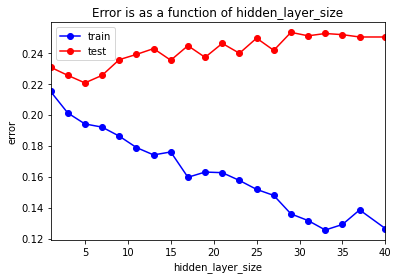

In [26]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print(f"Train: минимальное значение ошибки = {np.min(train_err)}, число нейронов = {hidden_layer_size[np.argmin(train_err)]}")
print(f"Test: минимальное значение ошибки = {np.min(test_err)}, число нейронов = {hidden_layer_size[np.argmin(test_err)]}")

Train: максимальное значение accuracy = 0.8743958154009137, число нейронов = 33
Test: максимальное значение accuracy = 0.7794448612153039, число нейронов = 5


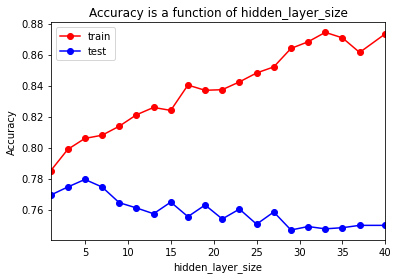

In [27]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print(f"Train: максимальное значение accuracy = {np.max(train_acc)}, число нейронов = {hidden_layer_size[np.argmax(train_acc)]}")
print(f"Test: максимальное значение accuracy = {np.max(test_acc)}, число нейронов = {hidden_layer_size[np.argmax(test_acc)]}")

Переобучение осталось

## Подбор числа нейронов в двухслойном классификаторе

In [30]:
n = 10
sizes = np.linspace(1, 60, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=3000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [41:03, 246.36s/it]


Train: минимальное значение ошибки = 0.04634840760113885, число нейронов = (8, 9)
Test: минимальное значение ошибки = 0.22168042010502625, число нейронов = (0, 2)


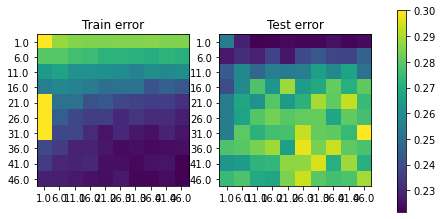

In [32]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = np.where(train_err == np.min(train_err))
print(f"Train: минимальное значение ошибки = {np.min(train_err)}, число нейронов = (" \
      f"{train_min_loss_sizes[0][0]}, {train_min_loss_sizes[1][0]})")

test_min_loss_sizes = np.where(test_err == np.min(test_err))
print(f"Test: минимальное значение ошибки = {np.min(test_err)}, число нейронов = (" \
      f"{test_min_loss_sizes[0][0]}, {test_min_loss_sizes[1][0]})")

Train: максимальное значение accuracy = 0.9536515923988611, число нейронов = (8, 9)
Test: максимальное значение accuracy = 0.7783195798949737, число нейронов = (0, 2)


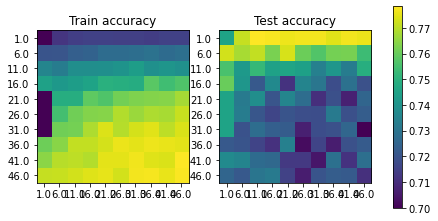

In [33]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))


train_max_acc_sizes = np.where(train_acc == np.max(train_acc))
print(f"Train: максимальное значение accuracy = {np.max(train_acc)}, число нейронов = (" \
      f"{train_max_acc_sizes[0][0]}, {train_max_acc_sizes[1][0]})")

test_max_acc_sizes = np.where(test_acc == np.max(test_acc))
print(f"Test: максимальное значение accuracy = {np.max(test_acc)}, число нейронов = (" \
      f"{test_max_acc_sizes[0][0]}, {test_max_acc_sizes[1][0]})")

## Подбор параметра регуляризации

In [34]:
alpha_arr = np.logspace(-5, 5, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (22,), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [06:48<00:00,  8.17s/it]


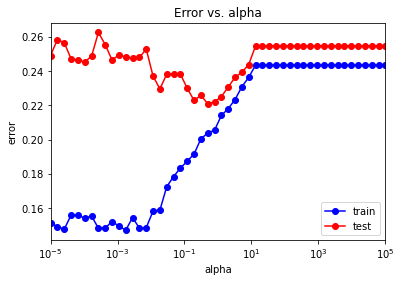

In [35]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

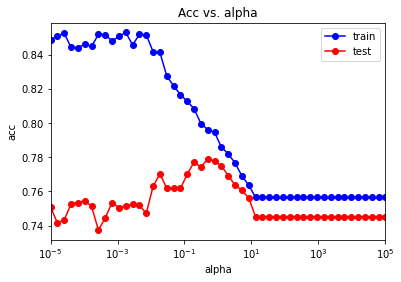

In [36]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Acc vs. alpha')
plt.xlabel('alpha')
plt.ylabel('acc')
plt.legend()

In [47]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train.astype('int64'), y_train_prediction)
      * 100, accuracy_score(y_test.astype('int'), y_test_prediction) * 100))

Train: 79.48% Test: 77.76%


Из графика выше видим, что при значениях alpha < 1 наблюдается переобучение. 

In [37]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

alpha_optarr = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_optarr[0]
print(alpha_opt)

0.14705687611732768 0.22093023255813954
0.49417133613238384


In [42]:
test_err = []
train_err = []
train_acc = []
test_acc = []
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (22,), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
    
train_err.append(np.mean(y_train != y_train_pred))
test_err.append(np.mean(y_test != y_test_pred))
    
train_acc.append(accuracy_score(y_train, y_train_pred))
test_acc.append(accuracy_score(y_test, y_test_pred))

In [48]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train.astype('int64'), y_train_prediction)
      * 100, accuracy_score(y_test.astype('int'), y_test_prediction) * 100))

Train: 79.48% Test: 77.76%


## Вывод

## Подбор числа нейронов в однослойном классификаторе

1) Видим, что у нас переобучение, даже с другими параметрами и другим алгоритмом

2) Максимальное значение accuracy = 78.1%, число нейронов = 2

## Подбор числа нейронов в двухслойном классификаторе

1) Большая разница минимального значения у тренировочной выборки и тестовой - значит тут переобучение.

2) Максимальное значение accuracy = 78.5%, число нейронов = (0, 8)



## Подбор параметра регуляризации

При смене параметра регуляризации избавиться от переобучения не удалось. Это может быть обусловленно сложной моделью. Точность повысить так и не удалось.